# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li><b>PatientId:</b> <span>Id of the patient</span></li>
    <li><b>AppointmentID:</b> <span>Id of the appointment</span></li>
    <li><b>Gender:</b> <span>Gender of the patient, male or female</span></li>
    <li><b>ScheduledDay:</b> <span>Date which the patient scheduled the appointment</span></li>
    <li><b>Age:</b> <span>Age of the patient</span></li>
    <li><b>Neighbourhood:</b> <span>Location of the hosptial or the clinic</span></li>
    <li><b>Scholarship:</b> <span> Did the patient enroll in Brasilian welfare program Bolsa Família?</span>
        <br/>
        <span>Bolsa Familia is a program supported by brasilian governnment aim to support poor people in barazil </span>
    </li>
     <li><b>Hipertension:</b> <span>Is the patient suffering from Hipertension?</span></li>
     <li><b>Diabetes:</b> <span>Is the patient suffering from Diabetes?</span></li>
     <li><b>Alcoholism:</b> <span>Is the patient suffering from Alcoholism?</span></li>
     <li><b>Handcap:</b> <span>Is the patient Handicap?</span></li>
     <li><b>SMS_received:</b> <span>Did the patient recieve SMS for the appointment?</span></li>
     <li><b>No-show:</b> <span>Did the patient show up o his/her appointment?</span></li>
</ul>
    


### Question(s) for Analysis
* which range of age are patients?
* Did Bolsa Familia scholarship affecting on the patient to show up to his/her appointment or not ?
* Which neighbourhood with most no-show appointment ?
* Is there a specific disease affecting on the patient to show up to his/her appointment or not ?
* Which gender with with most non-show appointment ?
* Should the patient schedule his/her appointment before appointment at least one day ?
* If hosptial notifed the patient with appointment, would it affect ?

In [126]:
# import pandas, numpy, and matplot then load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#this line to show plots with this notebook 
%matplotlib inline

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [127]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01  3% |█▎                              | 399kB 24.7MB/s eta 0:00:01    15% |█████                           | 1.6MB 26.3MB/s eta 0:00:01    27% |█████████                       | 2.9MB 28.6MB/s eta 0:00:01    40% |█████████████                   | 4.2MB 30.0MB/s eta 0:00:01    52% |█████████████████               | 5.5MB 25.3MB/s eta 0:00:01    78% |█████████████████████████▏      | 8.2MB 28.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   40% |█████████████▏                  | 5.5MB 27.5MB/s eta 0:00:01    77% |████████████████████████▊       | 10.3MB 25.3MB/s eta 0:00:01    94% |██████████████████████████████▍ | 12.7MB 22.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Load the data and check the nan values, duplicated rows, datatypes, unique values for some features

In [128]:
# print the first 5 rows of the data to explore 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [129]:
# print number of samples and number of feature
print("Before Cleanning, Number of Sample: {}, Number of Features(columns): {}".format(df.shape[0], df.shape[1]))

Before Cleanning, Number of Sample: 110527, Number of Features(columns): 14


In [130]:
# checking how many NaN values in each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> As shown above there is no NaN values int this dataset , but we can conclude that there are two types needed to be converted,  "ScheduledDay" and "AppointmentDay" 

In [131]:
# check if there is duplicted rows or not 
sum(df.duplicated())

0

> As shown above there is no duplicates rows in this dataset


In [132]:
#check unique values 
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [133]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [134]:
df['Scholarship'].unique()

array([0, 1])

In [135]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning
> We need to convert the "ScheduledDay" and "AppointmentDay" to datetime. And rename col No-show to No_show (replace '-' with '_') as it causes some issues when using query statment  
 

In [136]:
# convert "ScheduledDay" and "AppointmentDay" to datetime

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])


In [137]:
#rename col No-show replace '-' to '_'
df.rename(columns={'No-show': 'No_show'},inplace =True)

In [138]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis


In [139]:

#define function to draw bars to avoid repeating code
def plot_bars_for_dataframe(df,title):
    """
    Plot bars for series of the dataframe in same graph.

    Args:
        (DataFrame) df - the dataframe which contains the series that will be drawn in bar graph
        (str) title - name of the title which will be assign to the plot
    Returns:
        plot the bars and show its values 
    """
    # show values
    print(df.head())
    # count number of series to assign colors for each one
    # we have two cases, df contains two series and other contains four series
    if df.shape[1] == 2:
        colors = ["SkyBlue","IndianRed"]
    else:
        colors = ["SkyBlue","IndianRed","Green","Blue"]
    ax = df.plot.bar(color=colors, rot=0, title=title)
    ax.set_xlabel("Shows Up")
    ax.set_ylabel("Number of Patients")
    plt.show()
    
#define function to plot distribution of categories features
def plot_bars_for_categorical(df,feature_name,title):
    """
    Plot bars for distribution of categories features.

    Args:
        (DataFrame) df - the dataframe which contains dataset
        (str) feature_name - name of the feature will be plot its distribution
        (str) title - name of the title which will be assign to the plot
    Returns:
        plot the bars and show its values 
    """
    print(pd.DataFrame({"Number of Patient": df.groupby([feature_name]).count()['PatientId']}))
    df.groupby([feature_name]).count()['PatientId'].plot(kind='bar', title=title)
    plt.ylabel("Number of Patient")
    

In [140]:
# show statistic 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###### Before answeing the question, we need to chek the distribution and perhaps outliers for our features

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
No,88208.0,37.790064,23.338878,-1.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


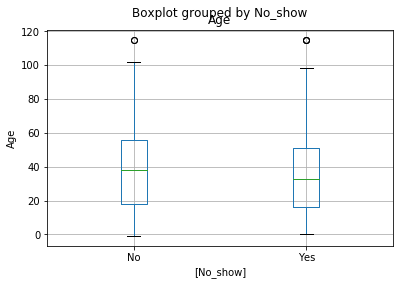

In [141]:
#let's begin with the age feature,let's show if it has outiler or not using boxplot and its distribution
df.boxplot(column=['Age'], by=['No_show'])
plt.ylabel('Age')
pd.DataFrame(df.groupby(['No_show'])['Age'].describe())

let's show what about of distribution of Scholarship feature

             Number of Patient
Scholarship                   
0                        99666
1                        10861


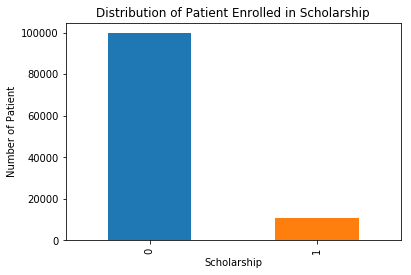

In [142]:
plot_bars_for_categorical(df,'Scholarship','Distribution of Patient Enrolled in Scholarship')

let's do the same with all categorical features

              Number of Patient
Hipertension                   
0                         88726
1                         21801


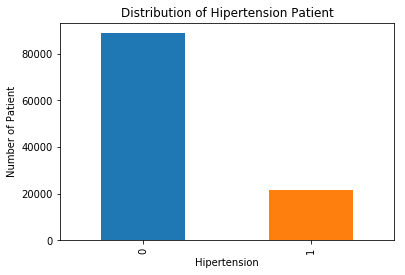

In [143]:
plot_bars_for_categorical(df,'Hipertension','Distribution of Hipertension Patient')

          Number of Patient
Diabetes                   
0                    102584
1                      7943


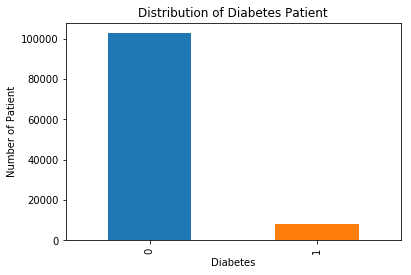

In [144]:
plot_bars_for_categorical(df,'Diabetes','Distribution of Diabetes Patient')


            Number of Patient
Alcoholism                   
0                      107167
1                        3360


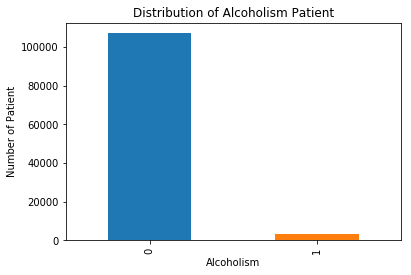

In [145]:
plot_bars_for_categorical(df,'Alcoholism','Distribution of Alcoholism Patient')

         Number of Patient
Handcap                   
0                   108286
1                     2042
2                      183
3                       13
4                        3


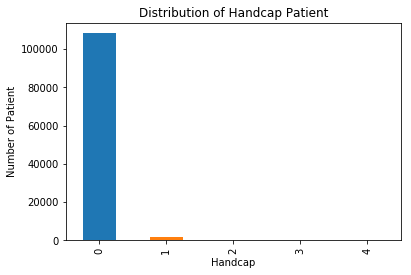

In [146]:
plot_bars_for_categorical(df,'Handcap','Distribution of Handcap Patient')

> as noted from the above graph there are a little who suffer from Handcap

              Number of Patient
SMS_received                   
0                         75045
1                         35482


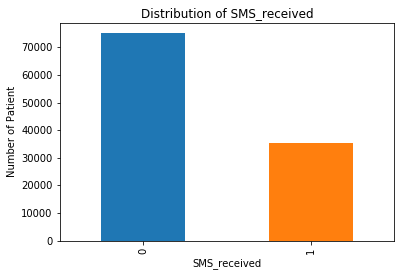

In [147]:
plot_bars_for_categorical(df,'SMS_received','Distribution of SMS_received')

###  which range of age are patients?

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


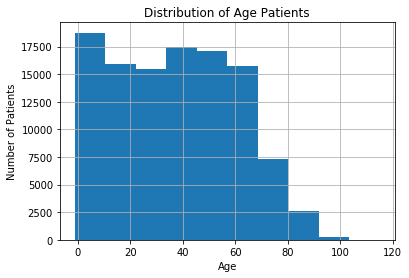

In [148]:
#let's draw hist for age to check 
print(df['Age'].describe())
df['Age'].hist()
plt.ylabel("Number of Patients")
plt.xlabel("Age")
plt.title("Distribution of Age Patients")
plt.show()

>From hist of age we found that most patient age range fill between around 18 and 56

### Did Bolsa Familia scholarship affecting on the patient to show up to his/her appointment or not?

> To check if Bolsa Familia scholarship affects or not, we need to compare patients enrolled in this shcolarship and shows up to his/her appointment and patients didn't enroll in this shcolarship and shows up to his/her appointment


In [149]:
# note: put in your mind that the col (No-show) has two values (No: means the patient attend, Yes: means he didn't attend)

# get all patients that enrolled in the scholarship
# we filter by Scholarship = 1
enroll_show = df.query('Scholarship == 1')
enroll_show_count = enroll_show['No_show'].value_counts()

In [150]:
# same filter as above but scholarship 0 not 1
none_enroll_show = df.query('Scholarship == 0')
none_enroll_show_count = none_enroll_show['No_show'].value_counts()

     enroll_show   none_enroll_show
No           8283             79925
Yes          2578             19741


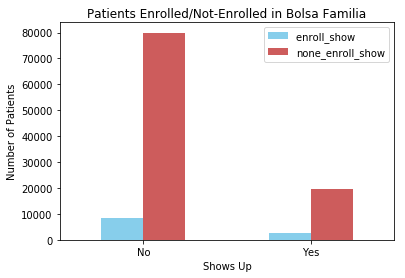

In [151]:
#create dataframe with the two series to able to draw them in same graph and compare
df_bf = pd.DataFrame({"enroll_show ":enroll_show_count,"none_enroll_show":none_enroll_show_count})
plot_bars_for_dataframe(df_bf,"Patients Enrolled/Not-Enrolled in Bolsa Familia")


>From previous analysis, it seems that Bolsa Familia scholarship didn't affect on the patient to show up to his/her appointment or not as the preccentage is almost equal on the two cases, but we notice that there are a lot of patients who didn't enroll in this scholarship

### Which neighbourhood with most no-show appointments ?

> To get neighbourhood with most no-show, we need to get prcentage of "no-show" for each neighbourhood, and max prcentage will be the neighbourhood with most no-show.
to get this prcentage for each neighbourhood, we need to count "show" and "no-show" for each neighbourhood, then divide "no-show" over summation of "show" and "no-show"
note: why we need to calculate the precentage? we can get "no-show" and get the max without precentage?
we must calculate the precntage and get the max, because count of records for each neighbourhood is not equal.

In [159]:
#get all rows with no-show 
df_no_show = df.query('No_show == "Yes"')
#get all rows with show
df_show = df.query('No_show == "No"')
# get count of neighbourhood
show = df_show.groupby(['Neighbourhood']).count()['No_show']
no_show = df_no_show.groupby(['Neighbourhood']).count()['No_show']
#get prcentage
prcentage_no_show = np.divide(no_show , np.add(show , no_show)) 
#sort precntage
sorted_prcentage_no_show = prcentage_no_show.sort_values(ascending = False)

# we will use the first 10 record as we don't need the reset 
first_10 = sorted_prcentage_no_show.head(10)
first_10

Neighbourhood
NOVA PALESTINA       0.997519
MONTE BELO           0.674797
MARIA ORTIZ          0.451984
MARUÍPE              0.442589
JESUS DE NAZARETH    0.373190
MÁRIO CYPRESTE       0.337500
JOANA D´ARC          0.315018
JARDIM CAMBURI       0.310974
ITARARÉ              0.309628
SANTOS DUMONT        0.289185
Name: No_show, dtype: float64

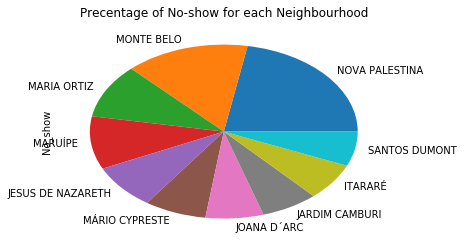

In [161]:
first_10.plot(kind='pie')
plt.title('Precentage of No-show for each Neighbourhood')
plt.show()

> From analysis above we found that the follwoing neighbourhoods are the most no-show neighbourhood:
* NOVA PALESTINA       
* MONTE BELO           
* MARIA ORTIZ          
* MARUÍPE              
* JESUS DE NAZARETH    
* MÁRIO CYPRESTE       
* JOANA D´ARC          
* JARDIM CAMBURI       
* ITARARÉ              
* SANTOS DUMONT        

### Is there a specific disease affecting on the patient to show up to his/her appointment or not ?

> To check if the disease affects on the patient to show up to his/her appointment or not, we need to get the patients with a specific disease and compare how many shows up and no shows up. for this dataset, there are 4 disease so we will do same operation for each one 

In [162]:
# work on the first disease (Hipertension)
# get all rows with Hipertension = 1
hipertension_df = df.query('Hipertension == 1')

#get counts of "show" and "no-show"
hipertension = hipertension_df['No_show'].value_counts()

In [163]:
# work on the second disease (Hipertension)
# get all rows with Diabetes = 1
diabetes_df = df.query('Diabetes == 1')

#get counts of "show" and "no-show"
diabetes = diabetes_df['No_show'].value_counts()

In [164]:
# work on the third disease (Alcoholism)
# get all rows with Alcoholism = 1
alcoholism_df = df.query('Alcoholism == 1')

#get counts of "show" and "no-show"
alcoholism = alcoholism_df['No_show'].value_counts()

In [165]:
# work on the fourth disease (Handcap)
# get all rows with Handcap = 1
handcap_df = df.query('Handcap == 1')

#get counts of "show" and "no-show"
handcap = handcap_df['No_show'].value_counts()

     Hipertension  Diabetes  Alcoholism  Handcap
No          18029      6513        2683     1676
Yes          3772      1430         677      366


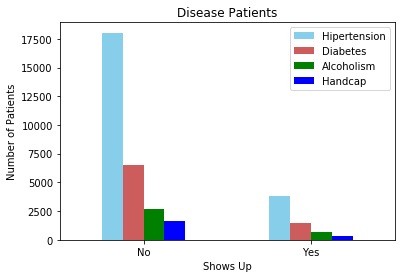

In [166]:
#create dataframe with the four series to able to draw them in same graph and compare
df_disease = pd.DataFrame({"Hipertension":hipertension,"Diabetes":diabetes, "Alcoholism": alcoholism, "Handcap": handcap})
plot_bars_for_dataframe(df_disease,"Disease Patients")

> From the above analysis, it seems that no specific disease affects on the patient to show up to his/her appointment as all disease give us almost the same prcetage, but we notice that number of patients with hipertension disease is much higher the other

### Which gender with with most no-show appointment ?

> Does the gender affect on the patient  to show up to his/her appointment? 
To get the answer, we need to get 
* Gender 'F' with count of "show" and "no-show"
* Gender 'M' with count of "show" and "no-show"
* Then compare between them 

In [167]:
#get all female patients records
gender_f_df = df.query('Gender == "F"')
gender_f = gender_f_df['No_show'].value_counts()


In [168]:
#get all male patients records
gender_m_df = df.query('Gender == "M"')
gender_m = gender_m_df['No_show'].value_counts()

     Female   Male
No    57246  30962
Yes   14594   7725


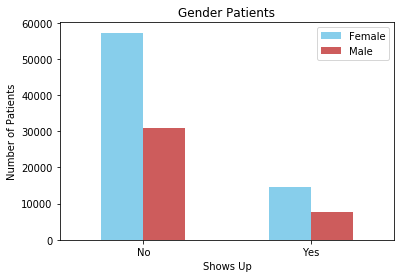

In [169]:
#create dataframe with the two series to able to draw them in same graph and compare
df_gender = pd.DataFrame({"Female":gender_f,"Male":gender_m})
plot_bars_for_dataframe(df_gender,"Gender Patients")

> From the above analysis, it seems that gender doesn't affect as it is almost same prcentage, but we notice that female rate  is much more than male 

### Should the patient schedule his/her appointment before appointment at least one day ?

> we need to check if the patient schedule appointment before 1 day affect or not. As we know there are two columns for dates, one for scheduled one and the other for appointment. 
To check, we need to get all rows with ( scheduled - appointment) > 0, then count them with "show" and "no-show". Then do the same with the other rows

In [170]:
# add another column with substract AppointmentDay from ScheduledDay and calculate the diff in days
df['diff_days']=(df['ScheduledDay'] - df['AppointmentDay'])/np.timedelta64(1,'D')
#query all rows which the patient schedule the appointmnent before at least one day
more_than_one_day_df = df.query('diff_days > 0')

In [171]:
#query all rows which patient schedule the appointment on time or before hours not days
one_day_df = df.query('diff_days <= 0')

In [172]:
#confirm that summation of the two rows equals the dataset rows
more_than_one_day_df.shape[0] + one_day_df.shape[0] == df.shape[0] #should return true

True

In [173]:
#get count of show and no show for more_than_one_day_df
more_than_one_day = more_than_one_day_df['No_show'].value_counts()

In [174]:
#get count of show and no show for one_day_df
one_day = one_day_df['No_show'].value_counts()

     GreaterThanOneDay  LessThanOrEqualOneDay
No               36771                  51437
Yes               1797                  20522


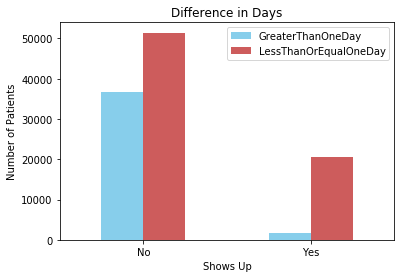

In [175]:
#create dataframe with the two series to able to draw them in same graph and compare
df_diff_in_days = pd.DataFrame({"GreaterThanOneDay":more_than_one_day,"LessThanOrEqualOneDay":one_day})
plot_bars_for_dataframe(df_diff_in_days,"Difference in Days")

> From above analysis, we notice that if the patient schedule his/her appointment before one day or more, he will almost come as the precentage of no show is high. 

### If hosptial notifed the patient with appointment, would it affect ?

> To check if the hosptial notied the patient, he/she would come or not, we need to compare count of notifed patients who attend and not with not notifed patients who attend and not

In [176]:
#get all notified patients records
notifed_df = df.query('SMS_received == 1')
notifed = notifed_df['No_show'].value_counts()

In [177]:
#get all not notified patients records
not_notifed_df = df.query('SMS_received == 0')
not_notifed = not_notifed_df['No_show'].value_counts()

     Notified  Not-Notified
No      25698         62510
Yes      9784         12535


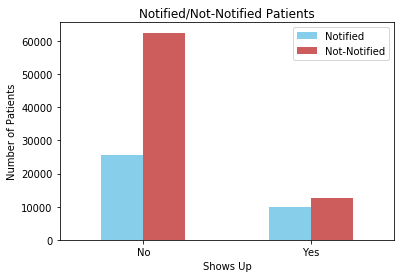

In [178]:
#create dataframe with the two series to able to draw them in same graph and compare
df_disease = pd.DataFrame({"Notified":notifed,"Not-Notified":not_notifed})
plot_bars_for_dataframe(df_disease,"Notified/Not-Notified Patients")

In [179]:
not_notifed 

No     62510
Yes    12535
Name: No_show, dtype: int64

In [180]:
notifed

No     25698
Yes     9784
Name: No_show, dtype: int64

> from the above analysis, it seems that if hosptial didn't notife the patient with appointment, it would affect. as shown above prcentage of not notified is higher that notified 

<a id='conclusions'></a>
## Conclusions

### Results 
* Dataset hasn't null values. 
* There are no duplicates rows.
* Bolsa Familia scholarship almost doen't affect on no-show output
* Most no-show neighbourhood: NOVA PALESTINA
* No-show precntage of SMS received group is higher than unreceived group.
* Most patients suffer from Hipertension disease
* Most patients are female
* If patient schedule before his/her appointement at least before one day, he/she almost attend his/her appointment 

### Limitations
* This Dataset is collected from Brazil only, I belive it will be better if we choose more than one country to detect what is the most factor that may affect on the patient will show up to his/her appointment.
* we can add another feature that may be useful "education". I think patient may be uneducated to read the SMS, so hosptial may use call instead of SMS. 
* Number of samples is 110527, I think it isn't enough for this analysis.
* Most of variables are categorical which doen't allow us to get correlation between them, and also it doen't allow us to get high level statistic

In [181]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0